#Telecom X – Parte 2: Predicción de Cancelación (Churn)

---



🎯 Misión

Desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

🧠 Objetivos del Desafío

*   Preparar los datos para el modelado (tratamiento, codificación, normalización).
*   Realizar análisis de correlación y selección de variables.
*   Entrenar dos o más modelos de clasificación.
*   Evaluar el rendimiento de los modelos con métricas.
*   Interpretar los resultados, incluyendo la importancia de las variables.
*   Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.




##Librerias

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE


#🛠️ Preparación de los Datos

##Extracción del Archivo

Se carga el archivo y se realiza la lectura de sus datos.

In [7]:
datos = "/content/df_final.csv"

In [8]:
datos = pd.read_csv(datos)

In [12]:
datos.head(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.16
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.97
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.43
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.22
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.76


Se utiliza el método info() para obtener un resumen de las columnas, sus tipos de datos y el conteo de valores válidos.

In [10]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   int64  
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   int64  
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   int64  
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   int64  
 15  StreamingMovies   7267 non-null   int64  
 16  Contract          7267 non-null   object 


Se identificaron los valores únicos presentes en la columna gender utilizando el método unique().

In [13]:
datos.gender.unique()

array(['Female', 'Male'], dtype=object)

Se transformaron las categorías de la columna gender a valores numéricos, asignando 1 a 'Male' y 0 a 'Female', utilizando el método map().

In [14]:
datos['gender'] = datos['gender'].map({'Male': 1, 'Female': 0})

In [15]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   int64  
 2   gender            7267 non-null   int64  
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   int64  
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   int64  
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   int64  
 15  StreamingMovies   7267 non-null   int64  
 16  Contract          7267 non-null   object 


##Eliminación de Columnas Irrelevantes

Se realizó la eliminación de la columna irrelevante "customerID" mediante datos.drop()

In [16]:
datos=datos.drop(columns='customerID')
datos.columns

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias'],
      dtype='object')

Se separaron las variables independientes (X) de la variable objetivo (Churn), eliminando esta última de la matriz de entrada.

In [17]:
xIn=datos.drop(columns='Churn')
yOut=datos['Churn']

## Verificación de la Proporción de Cancelación (Churn)

Se evaluó el desbalance de las variables binarias o categóricas aplicando un umbral del 70%: para cada columna con ≤2 categorías o de tipo object, se calculó la frecuencia relativa de la categoría más frecuente. Aquellas con una proporción superior al umbral se marcaron para eliminación por baja variabilidad.

In [18]:
umbral = 0.70
columnas_a_eliminar = []

for columna in datos.columns:
    if datos[columna].nunique() <= 2 or datos[columna].dtype == 'object':
        frecuencia_max = datos[columna].value_counts(normalize=True).max()
        if frecuencia_max > umbral:
            columnas_a_eliminar.append(columna)
            print(f"Columna '{columna}' tiene {frecuencia_max*100:.2f}% en una categoría.")
if columnas_a_eliminar:
    print(f"\nColumnas a eliminar por desbalance (>{umbral*100}% en una categoría):")
    print(columnas_a_eliminar)
else:
    print(f"No se encontraron columnas con desbalance >{umbral*100}%.")

Columna 'Churn' tiene 74.28% en una categoría.
Columna 'SeniorCitizen' tiene 83.73% en una categoría.
Columna 'PhoneService' tiene 90.27% en una categoría.
Columna 'OnlineSecurity' tiene 71.40% en una categoría.
Columna 'TechSupport' tiene 71.05% en una categoría.

Columnas a eliminar por desbalance (>70.0% en una categoría):
['Churn', 'SeniorCitizen', 'PhoneService', 'OnlineSecurity', 'TechSupport']


Se eliminó la columna PhoneService por presentar más del 90% de sus valores en una sola categoría, lo que la convierte en poco relevante para el modelo.

In [19]:
#Datos irrelevantes para el modelo <90%
datos=datos.drop(columns='PhoneService')
datos.columns

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total', 'Cuentas_Diarias'],
      dtype='object')

In [20]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   int64  
 1   gender            7267 non-null   int64  
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   int64  
 4   Dependents        7267 non-null   int64  
 5   tenure            7267 non-null   int64  
 6   MultipleLines     7267 non-null   int64  
 7   InternetService   7267 non-null   object 
 8   OnlineSecurity    7267 non-null   int64  
 9   OnlineBackup      7267 non-null   int64  
 10  DeviceProtection  7267 non-null   int64  
 11  TechSupport       7267 non-null   int64  
 12  StreamingTV       7267 non-null   int64  
 13  StreamingMovies   7267 non-null   int64  
 14  Contract          7267 non-null   object 
 15  PaperlessBilling  7267 non-null   int64  
 16  PaymentMethod     7267 non-null   object 


El sistema identificó correctamente las siguientes columnas como categóricas, las cuales serán procesadas en el siguiente paso: ['InternetService', 'Contract', 'PaymentMethod']

In [21]:
categoricas = datos.select_dtypes(include=['object']).columns.tolist()
print("Variables categóricas:", categoricas)

Variables categóricas: ['InternetService', 'Contract', 'PaymentMethod']


In [22]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

columnas=xIn.columns
one_hot_encoder = make_column_transformer(
    (OneHotEncoder(drop='if_binary'),categoricas),
    remainder='passthrough',
    sparse_threshold=0
)
x=one_hot_encoder.fit_transform(xIn)
one_hot_encoder.get_feature_names_out(columnas)
xIn=pd.DataFrame(x, columns=one_hot_encoder.get_feature_names_out(columnas))

In [23]:
xIn.columns

Index(['onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No',
       'onehotencoder__Contract_Month-to-month',
       'onehotencoder__Contract_One year', 'onehotencoder__Contract_Two year',
       'onehotencoder__PaymentMethod_Bank transfer (automatic)',
       'onehotencoder__PaymentMethod_Credit card (automatic)',
       'onehotencoder__PaymentMethod_Electronic check',
       'onehotencoder__PaymentMethod_Mailed check', 'remainder__gender',
       'remainder__SeniorCitizen', 'remainder__Partner',
       'remainder__Dependents', 'remainder__tenure', 'remainder__PhoneService',
       'remainder__MultipleLines', 'remainder__OnlineSecurity',
       'remainder__OnlineBackup', 'remainder__DeviceProtection',
       'remainder__TechSupport', 'remainder__StreamingTV',
       'remainder__StreamingMovies', 'remainder__PaperlessBilling',
       'remainder__Charges.Monthly', 'remainder__Charges.Total',
       'remaind

In [24]:
xIn

,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,...,remainder__OnlineSecurity,remainder__OnlineBackup,remainder__DeviceProtection,remainder__TechSupport,remainder__StreamingTV,remainder__StreamingMovies,remainder__PaperlessBilling,remainder__Charges.Monthly,remainder__Charges.Total,remainder__Cuentas_Diarias
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,65.60,593.30,2.16
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.90,542.40,1.97
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,73.90,280.85,2.43
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,98.00,1237.85,3.22
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,83.90,267.40,2.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,55.15,742.90,1.81
7263,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,85.10,1873.70,2.80
7264,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,50.30,92.75,1.65
7265,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,67.85,4627.65,2.23


In [25]:
yOut

,Churn
0,0
1,0
2,1
3,1
4,1
...,...
7262,0
7263,1
7264,0
7265,0


##Balanceo de Clases

Mediante value_counts() se contabilizó la cantidad de registros por cada categoría en la variable Churn.

In [26]:
datos.Churn.value_counts()

,count
Churn,
0,5398
1,1869


Se examinó la estructura de las variables independientes (xIn) mediante el método info(), obteniendo información sobre el número de registros, tipos de datos y valores no nulos.

In [27]:
xIn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 27 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   onehotencoder__InternetService_DSL                      7267 non-null   float64
 1   onehotencoder__InternetService_Fiber optic              7267 non-null   float64
 2   onehotencoder__InternetService_No                       7267 non-null   float64
 3   onehotencoder__Contract_Month-to-month                  7267 non-null   float64
 4   onehotencoder__Contract_One year                        7267 non-null   float64
 5   onehotencoder__Contract_Two year                        7267 non-null   float64
 6   onehotencoder__PaymentMethod_Bank transfer (automatic)  7267 non-null   float64
 7   onehotencoder__PaymentMethod_Credit card (automatic)    7267 non-null   float64
 8   onehotencoder__PaymentMethod_Electroni

Se aplicó la técnica SMOTE (Synthetic Minority Over-sampling Technique) para balancear la variable objetivo, generando muestras sintéticas de la clase minoritaria y obteniendo los conjuntos x_over y y_over.

In [28]:
over_sampling=SMOTE()
x_over,y_over=over_sampling.fit_resample(xIn,yOut)

Se verificó la distribución de clases en y_over después de aplicar SMOTE, confirmando que ambas clases se encuentran balanceadas.

In [29]:
y_over.value_counts(normalize=False)

,count
Churn,
0,5398
1,5398


## **🎯 Correlación y Selección de Variables**

###Análisis de Correlación

Se reconstruyó el dataset completo (datosOneHotEncoder) combinando las variables independientes balanceadas (x_over) con la variable objetivo (y_over) mediante pd.concat().

In [30]:
datosOneHotEncoder=pd.concat([x_over.reset_index(drop=True), y_over.reset_index(drop=True)], axis=1)
datosOneHotEncoder

,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,...,remainder__OnlineBackup,remainder__DeviceProtection,remainder__TechSupport,remainder__StreamingTV,remainder__StreamingMovies,remainder__PaperlessBilling,remainder__Charges.Monthly,remainder__Charges.Total,remainder__Cuentas_Diarias,Churn
0,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.000000,1.0,...,1.000000,0.000000,1.0,1.000000,0.000000,1.0,65.600000,593.300000,2.160000,0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.000000,1.0,...,0.000000,0.000000,0.0,0.000000,1.000000,0.0,59.900000,542.400000,1.970000,0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,0.0,1.000000,0.0,...,0.000000,1.000000,0.0,0.000000,0.000000,1.0,73.900000,280.850000,2.430000,1
3,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,0.0,1.000000,0.0,...,1.000000,1.000000,0.0,1.000000,1.000000,1.0,98.000000,1237.850000,3.220000,1
4,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.000000,1.0,...,0.000000,0.000000,1.0,1.000000,0.000000,1.0,83.900000,267.400000,2.760000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10791,0.0,1.0,0.0,1.0,0.0,0.0,0.174006,0.0,0.825994,0.0,...,1.000000,0.000000,0.0,0.825994,0.174006,1.0,89.889098,6140.444200,2.948260,1
10792,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,0.0,1.000000,0.0,...,0.571645,0.571645,0.0,0.000000,0.428355,1.0,80.427976,1118.310921,2.638552,1
10793,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,0.0,1.000000,0.0,...,0.000000,0.000000,0.0,1.000000,1.000000,1.0,95.074844,95.074844,3.120000,1
10794,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,0.0,1.000000,0.0,...,0.859351,0.000000,0.0,1.000000,0.859351,1.0,97.945750,3184.469939,3.215301,1


Mediante corr() se obtuvieron los coeficientes de correlación entre las variables, analizando en particular su relación con Churn.

In [31]:
datosOHE=datosOneHotEncoder.corr()
datosOHE['Churn']

,Churn
onehotencoder__InternetService_DSL,-0.159265
onehotencoder__InternetService_Fiber optic,0.364130
onehotencoder__InternetService_No,-0.292288
onehotencoder__Contract_Month-to-month,0.487851
onehotencoder__Contract_One year,-0.227889
onehotencoder__Contract_Two year,-0.386995
onehotencoder__PaymentMethod_Bank transfer (automatic),-0.143339
onehotencoder__PaymentMethod_Credit card (automatic),-0.166146
onehotencoder__PaymentMethod_Electronic check,0.346487
onehotencoder__PaymentMethod_Mailed check,-0.118418


Las variables más asociadas positivamente con Churn fueron Contract_Month-to-month (0.48), InternetService_Fiber optic (0.36) y PaymentMethod_Electronic check (0.34), mientras que las más asociadas negativamente fueron tenure (-0.40) y Contract_Two year (-0.39). En general, los contratos de mayor duración y el mayor tiempo de permanencia se relacionan con menor churn, mientras que los contratos mes a mes y ciertos métodos de pago se asocian con mayor churn. Estas correlaciones no implican causalidad.

In [32]:
variables_correlacionadas = [
    "onehotencoder__Contract_Month-to-month",       # Positiva (0.48)
    "remainder__tenure",                           # Negativa (-0.40)
    "onehotencoder__Contract_Two year",            # Negativa (-0.39)
    "onehotencoder__InternetService_Fiber optic",  # Positiva (0.36)
    "onehotencoder__PaymentMethod_Electronic check", # Positiva (0.34)
    "onehotencoder__InternetService_No",           # Negativa (-0.29)
    "onehotencoder__Contract_One year",            # Negativa (-0.22)
    "remainder__Charges.Monthly",                  # Positiva (0.24)
    "remainder__Cuentas_Diarias",                  # Positiva (0.24)
    "remainder__Dependents",                       # Negativa (-0.21)
    "remainder__TechSupport",                      # Negativa (-0.21)
    "remainder__OnlineSecurity",                   # Negativa (-0.21)
    "remainder__PaperlessBilling",                 # Positiva (0.23)
    "remainder__Partner",                          # Negativa (-0.18)
    "remainder__SeniorCitizen"                     # Positiva (0.17)
]

###Análisis Dirigido

e calculó el ancho óptimo de los bins para el histograma utilizando la regla de Freedman–Diaconis: ancho = 2 * IQR * n^{-1/3}, donde IQR es el rango intercuartílico y n el número de observaciones. Esta regla es robusta a outliers.

In [33]:
def ancho_bin(df,columna):
  q75,q25 = np.percentile(df[columna],[75,25])
  iqr = q75-q25
  ancho = 2 * iqr * np.power(len(df[columna]), -1/3)
  return int(ancho)

Distribución del tenure en clientes que cancelaron. Se filtraron los registros con Churn = 1 y, utilizando la función ancho_bin (basada en la regla de Freedman–Diaconis), se determinó el número de bins óptimo para el histograma. Luego, se graficó la distribución de tenure mediante sns.histplot con curva de densidad (kde=True), a fin de evaluar la forma de la distribución y posibles concentraciones de cancelaciones en determinados rangos de antigüedad.

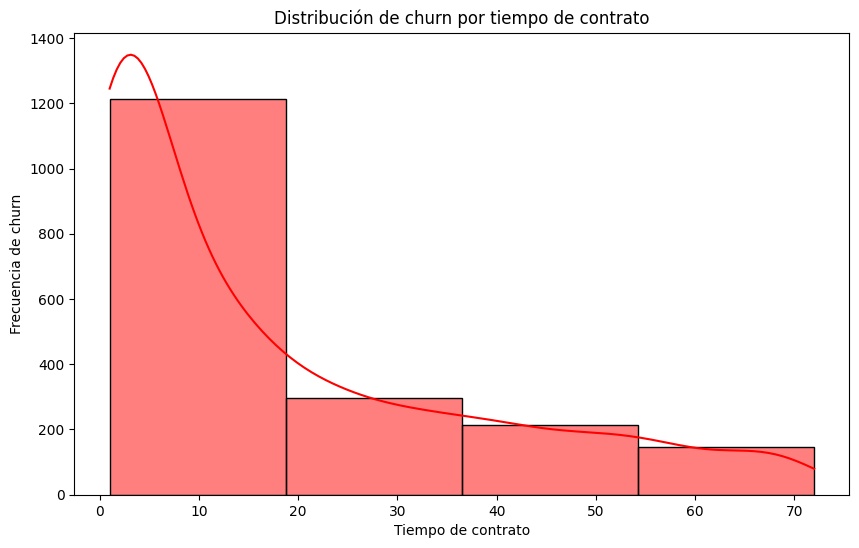

In [34]:
datos_churn = datos[datos['Churn'] == 1]

bin=ancho_bin(datos_churn,'tenure')
plt.figure(figsize=(10, 6))
sns.histplot(data=datos_churn, x='tenure', kde=True, bins=bin, color='red')
plt.title("Distribución de churn por tiempo de contrato")
plt.xlabel("Tiempo de contrato")
plt.ylabel("Frecuencia de churn")
plt.show()

Figura X. Distribución del tiempo de permanencia (tenure) entre los clientes que cancelaron (Churn = 1). El ancho de bin fue determinado mediante la regla de Freedman–Diaconis. La curva KDE permite apreciar la forma suavizada de la distribución.

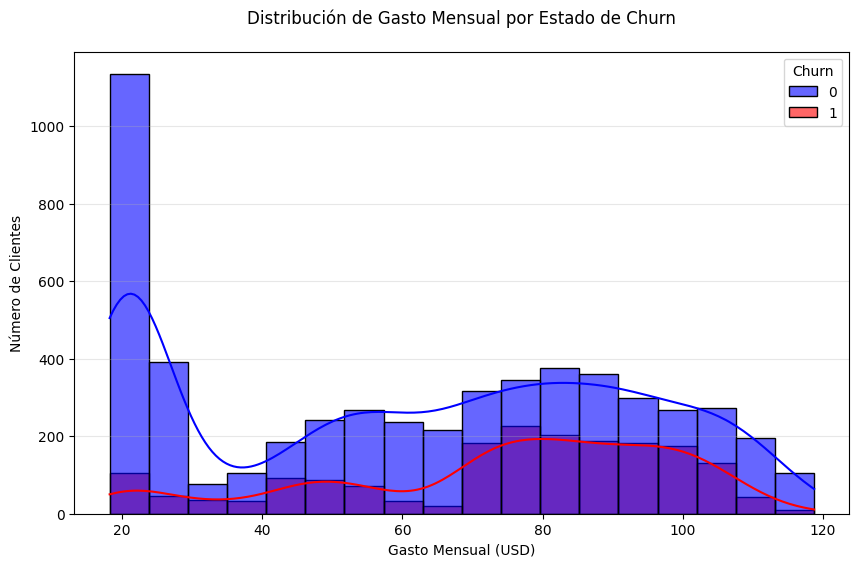

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=datos,
    x='Charges.Monthly',
    hue='Churn',
    kde=True,
    bins='auto',
    palette={0: 'blue', 1: 'red'},
    alpha=0.6,
    multiple='layer'
)
plt.title("Distribución de Gasto Mensual por Estado de Churn", pad=20)
plt.xlabel("Gasto Mensual (USD)")
plt.ylabel("Número de Clientes")
plt.grid(axis='y', alpha=0.3)
plt.show()

Podemos observar qué tipo de contrato presenta mayor o menor proporción de clientes que cancelaron el servicio. Por ejemplo, si el contrato "Month-to-month" (mes a mes) tiene una barra más alta, esto indica que los clientes con contratos mensuales tienen mayor tendencia a cancelar que aquellos con contratos a largo plazo, como "One year" o "Two year".

Este análisis es útil para entender cómo el tipo de compromiso contractual afecta la retención de clientes, y así poder diseñar estrategias específicas para reducir la tasa de cancelación en los segmentos más vulnerables.

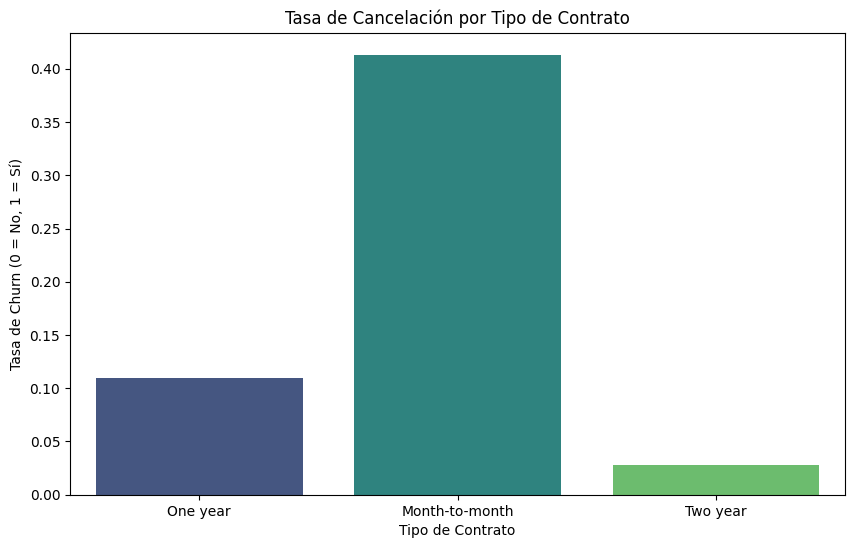

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Contract',
    y='Churn',
    hue='Contract',       # asigna el color según contrato
    data=datos,
    errorbar=None,
    palette='viridis',
    legend=False          # no muestra leyenda porque el x ya es el mismo
)
plt.title("Tasa de Cancelación por Tipo de Contrato")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Tasa de Churn (0 = No, 1 = Sí)")
plt.show()


Se puede observar si existen diferencias en los patrones de gasto entre los clientes que permanecen y los que se van. Por ejemplo, una concentración mayor de barras rojas en rangos bajos indicaría que los clientes que gastan menos tienen mayor probabilidad de cancelar el servicio. Por el contrario, si las barras azules predominan en rangos altos, sugiere que los clientes con mayor gasto tienden a mantenerse activos.

Este análisis ayuda a identificar segmentos de clientes con riesgo de churn basándose en su comportamiento de gasto total, facilitando la toma de decisiones para mejorar la retención.

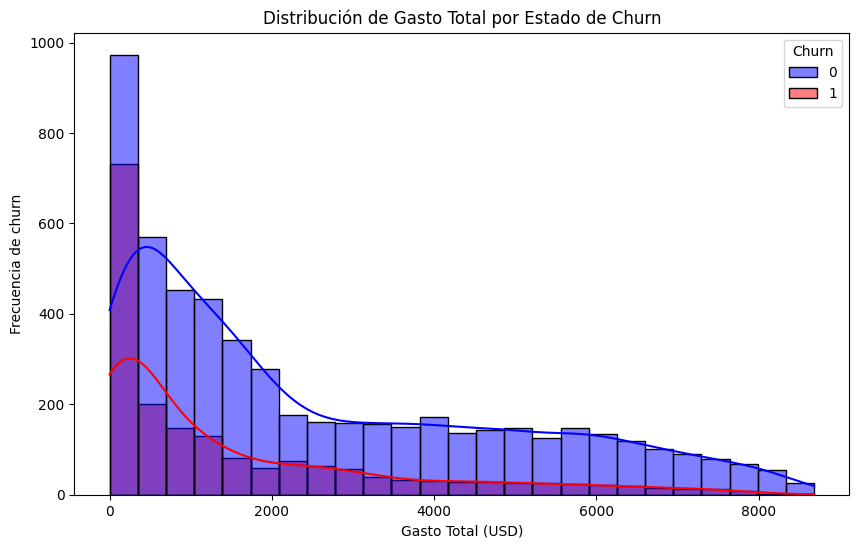

In [38]:
bin=ancho_bin(datos,'Charges.Total')
plt.figure(figsize=(10, 6))
sns.histplot(data=datos, x='Charges.Total', hue='Churn', kde=True, bins='auto',palette={0: 'blue', 1: 'red'})
plt.title("Distribución de Gasto Total por Estado de Churn")
plt.xlabel("Gasto Total (USD)")
plt.ylabel("Frecuencia de churn")
plt.show()

##Modelado Predictivo

###Separación de Datos

In [39]:
x_over.shape

(10796, 27)

In [40]:
label_encoder = LabelEncoder()
y=label_encoder.fit_transform(y_over)
y

array([0, 0, 1, ..., 1, 1, 1])

##Creación de Modelos

###Random Forest Classifier

Para evaluar correctamente el desempeño de un modelo predictivo, es fundamental dividir los datos en dos conjuntos independientes: uno para entrenar el modelo y otro para probarlo



*   x_over y y son las variables predictoras y la variable objetivo, respectivamente, que ya fueron preprocesadas y balanceadas previamente.

*   test_size=0.2 indica que el 20% de los datos se reservarán para el conjunto de prueba y el 80% restante para entrenamiento.

*   random_state=42 fija una semilla para garantizar que la división sea reproducible.

*   stratify=y_over asegura que la proporción de clases en la variable objetivo se mantenga igual en ambos conjuntos (entrenamiento y prueba), lo cual es importante para evitar sesgos en el muestreo.


In [41]:
x_trainRFC, x_testRFC, y_trainRFC, y_testRFC = train_test_split(x_over, y, test_size=0.2, random_state=42,stratify=y_over)

###**Entrenamiento y evaluación del modelo Random Forest**
En este paso, se entrena un modelo de clasificación basado en Random Forest para predecir la variable objetivo (churn) a partir de las características seleccionadas.



*   **RandomForestClassifier(random_state=42**, max_depth=10): crea un clasificador Random Forest con una profundidad máxima de 10 niveles para cada árbol, lo que ayuda a controlar el sobreajuste y mejora la generalización. La semilla random_state=42 asegura resultados reproducibles.

*   **fit(x_trainRFC, y_trainRFC)**: entrena el modelo usando el conjunto de entrenamiento.



*   **predict(x_testRFC)**: genera las predicciones para el conjunto de prueba.

*   **score(x_testRFC, y_testRFC)**: calcula la precisión (accuracy) del modelo en el conjunto de prueba, es decir, el porcentaje de predicciones correctas.


In [42]:
modeloRFC = RandomForestClassifier(random_state=42,max_depth=10)
modeloRFC.fit(x_trainRFC, y_trainRFC)
y_pred = modeloRFC.predict(x_testRFC)
modeloRFC.score(x_testRFC, y_testRFC)

0.8638888888888889

###Dummy

In [43]:
x_trainDummy, x_testDummy, y_trainDummy, y_testDummy = train_test_split(x_over, y, test_size=0.2, random_state=42,stratify=y_over)

In [44]:
baseline=DummyClassifier()
baseline.fit(x_trainDummy, y_trainDummy)


baseline.score(x_testDummy, y_testDummy)

0.5

###DecisionTreeClassifier

In [45]:
x_trainDTC, x_testDTC, y_trainDTC, y_testDTC = train_test_split(x_over, y, test_size=0.2, random_state=42,stratify=y_over)

In [46]:
arbol=DecisionTreeClassifier(random_state=42, max_depth=5)
arbol.fit(x_trainDTC, y_trainDTC)

arbol.score(x_testDTC, y_testDTC)

0.7972222222222223

In [47]:
arbol.score(x_trainDTC, y_trainDTC)

0.8142658638258453

##Evaluación de los Modelos


---- Rendimiento en TEST de Dummy ----
Accuracy: 0.5000
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1080
           1       0.00      0.00      0.00      1080

    accuracy                           0.50      2160
   macro avg       0.25      0.50      0.33      2160
weighted avg       0.25      0.50      0.33      2160

Matriz de confusión:
 [[1080    0]
 [1080    0]]

---- Rendimiento en TRAIN ----
Accuracy: 0.5000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


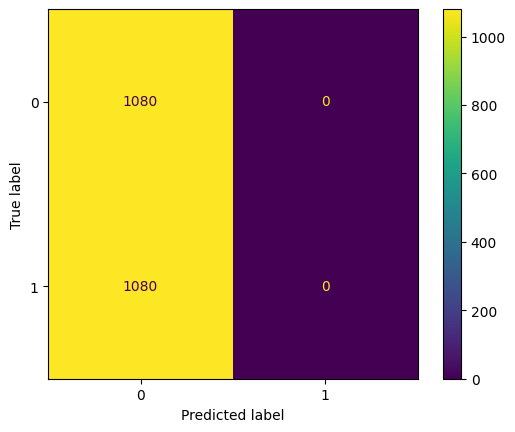

In [48]:
y_pred_dummy = baseline.predict(x_testDummy)

print("\n---- Rendimiento en TEST de Dummy ----")
print(f"Accuracy: {accuracy_score(y_testDummy, y_pred_dummy):.4f}")
print(classification_report(y_testDummy, y_pred_dummy))
print("Matriz de confusión:\n", confusion_matrix(y_testDummy, y_pred_dummy))

y_pred_train = baseline.predict(x_trainDummy)
print("\n---- Rendimiento en TRAIN ----")
print(f"Accuracy: {accuracy_score(y_trainDummy, y_pred_train):.4f}")
ConfusionMatrixDisplay.from_predictions(y_testDummy,y_pred_dummy)


---- Rendimiento en TEST de Decision Tree Classifier ----
Accuracy: 0.7972
              precision    recall  f1-score   support

           0       0.78      0.83      0.80      1080
           1       0.82      0.76      0.79      1080

    accuracy                           0.80      2160
   macro avg       0.80      0.80      0.80      2160
weighted avg       0.80      0.80      0.80      2160

Matriz de confusión:
 [[898 182]
 [256 824]]

---- Rendimiento en TRAIN ----
Accuracy: 0.8143


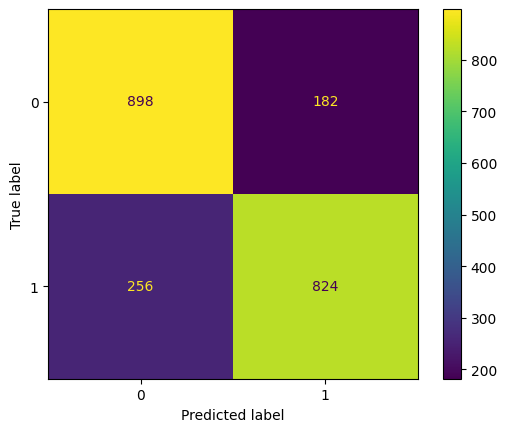

In [49]:
y_pred_arbol = arbol.predict(x_testDTC)

print("\n---- Rendimiento en TEST de Decision Tree Classifier ----")
print(f"Accuracy: {accuracy_score(y_testDTC, y_pred_arbol):.4f}")
print(classification_report(y_testDTC, y_pred_arbol))
print("Matriz de confusión:\n", confusion_matrix(y_testDTC, y_pred_arbol))

y_pred_train = arbol.predict(x_trainDTC)
print("\n---- Rendimiento en TRAIN ----")
print(f"Accuracy: {accuracy_score(y_trainDTC, y_pred_train):.4f}")
ConfusionMatrixDisplay.from_predictions(y_testDTC,y_pred_arbol)


---- Rendimiento en TEST de Random Forest Classifier ----
Accuracy: 0.8639
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1080
           1       0.85      0.89      0.87      1080

    accuracy                           0.86      2160
   macro avg       0.86      0.86      0.86      2160
weighted avg       0.86      0.86      0.86      2160

Matriz de confusión:
 [[908 172]
 [122 958]]

---- Rendimiento en TRAIN ----
Accuracy: 0.8976


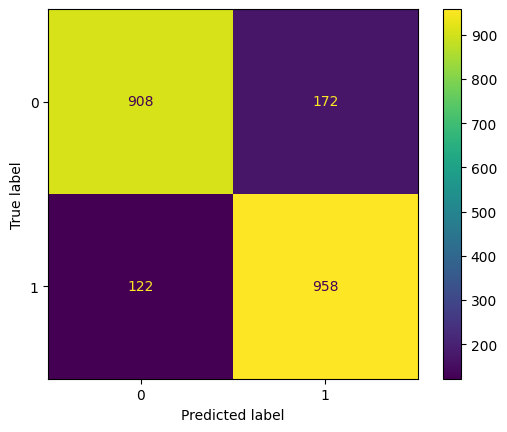

In [50]:
y_pred = modeloRFC.predict(x_testRFC)

print("\n---- Rendimiento en TEST de Random Forest Classifier ----")
print(f"Accuracy: {accuracy_score(y_testRFC, y_pred):.4f}")
print(classification_report(y_testRFC, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_testRFC, y_pred))

# Métricas en TRAIN (para diagnosticar overfitting)
y_pred_train = modeloRFC.predict(x_trainRFC)
print("\n---- Rendimiento en TRAIN ----")
print(f"Accuracy: {accuracy_score(y_trainRFC, y_pred_train):.4f}")

ConfusionMatrixDisplay.from_predictions(y_testRFC,y_pred)

¿Cuál modelo tuvo el mejor desempeño?

Comparación de Modelos y Desempeño
Modelo	Accuracy (Test)	Precision (Clase 1)	Recall (Clase 1)	F1-Score (Clase 1)
Dummy (baseline)	0.50	0.00	0.00	0.00
Decision Tree	0.80	0.82	0.76	0.79
Random Forest	0.86	0.85	0.89	0.87




*   El modelo **Dummy** es una línea base que predice siempre la clase mayoritaria o al azar. Su accuracy 0.50 indica que no aprendió nada útil y no predice ningún caso positivo (churn).

*   El **Decision Tree** mejora significativamente respecto al Dummy, con un accuracy de 0.80 y un equilibrio razonable entre precisión y recall.

*   El **Random Forest** obtiene el mejor desempeño general, con un accuracy de 0.86 en test, además de mejores métricas de precisión, recall y F1-score en la clase positiva (clientes que cancelaron).

###La matriz de confusión del Random Forest muestra que:

*   Predijo correctamente 908 no churn y 958 churn.

*   Tuvo menos falsos negativos (122) que el Decision Tree (256), es decir, identificó mejor a los clientes que efectivamente cancelaron.

En conclusión, el Random Forest es el modelo con mejor desempeño y mayor capacidad para detectar correctamente a los clientes que cancelan, por lo que es la mejor opción para este problema.




¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:

###Análisis de Overfitting y Underfitting
Modelo	Accuracy Train	Accuracy Test	Comentarios
Dummy	0.50	0.50	Sin aprendizaje, accuracy igual en ambos conjuntos. No hay over/underfitting.
Decision Tree	0.81	0.80	Accuracy muy similar entre train y test. Indica buen ajuste, sin overfitting significativo.
Random Forest	0.90	0.86	Accuracy en train más alta que en test, pero la diferencia (4 puntos) no es muy grande. Puede tener un leve overfitting controlado.

###**Observaciones:**



*   **Dummy:** No aprende nada, por lo que no presenta ni overfitting ni underfitting

*   **Decision Tree:** El desempeño es muy parecido entre entrenamiento y prueba. Esto indica que el modelo generaliza bien, sin sobreajuste importante ni subajuste.

*   **Random Forest:** La precisión en entrenamiento (0.90) es algo mayor que en test (0.86), lo que es común en Random Forest y sugiere un leve sobreajuste. Sin embargo, la diferencia no es demasiado grande, por lo que el modelo sigue siendo robusto.


###**Posibles causas y ajustes**


*   En el Decision Tree, la profundidad del árbol puede estar limitada o adecuada, evitando que aprenda demasiado los datos de entrenamiento y evitando sobreajuste.

*   En el Random Forest, la profundidad máxima (max_depth=10) y la aleatoriedad ayudan a controlar el sobreajuste.


      1.   Reducir la profundidad máxima de los árboles (max_depth)
      2.   Aumentar el número de árboles (n_estimators)
      3.   Usar regularización (min_samples_split, min_samples_leaf)


##Interpretación y Conclusiones

###Análisis de la Importancia de las Variables

Tras el entrenamiento y evaluación de los modelos seleccionados (Dummy, Decision Tree y Random Forest), se realizó un análisis exhaustivo para identificar las variables más relevantes en la predicción de la cancelación de clientes (churn). La selección inicial de variables se basó en su correlación con la variable objetivo, priorizando aquellas con una relación significativa —ya sea positiva o negativa—.

Entre las variables más destacadas se encuentran **Contract_Month-to-month, tenure, Contract_Two year, InternetService_Fiber optic y PaymentMethod_Electronic check.**
Por ejemplo, los clientes con contratos mensuales o con servicio de internet por fibra óptica presentan una mayor tendencia a cancelar, mientras que aquellos con mayor antigüedad **(tenure)** o con contratos a largo plazo tienen mayor probabilidad de permanecer.

El modelo **Dummy**, utilizado como línea base, confirmó que el problema de churn no puede resolverse mediante predicciones aleatorias. Al no considerar ninguna variable, su accuracy se mantuvo en un 50%, lo que refuerza la necesidad de modelos más sofisticados que realmente aprendan patrones de los datos.

En el caso del **Decision Tree**, el análisis de sus divisiones muestra que las variables mencionadas se encuentran en los nodos superiores del árbol, lo que evidencia su alta capacidad para diferenciar entre clientes que cancelan y los que no.

Por su parte, el **Random Forest**, al combinar múltiples árboles de decisión y calcular la importancia de las variables a través de la reducción de impureza (índice de Gini), confirmó estos hallazgos. Variables como **tenure, Contract_Month-to-month e InternetService_Fiber optic** se mantuvieron como las más influyentes en el modelo, en línea con el análisis de correlación inicial.

En conjunto, tanto el análisis estadístico como los modelos predictivos validan que las variables seleccionadas no solo son estadísticamente relevantes, sino también decisivas para el desempeño del modelo. Esto demuestra que el proceso de selección de variables fue acertado y consistente con la teoría y los resultados obtenidos.

##Modelos Predictivos y Análisis de Importancia de Variables

Para fortalecer los hallazgos del análisis exploratorio y establecer una base cuantitativa que permita predecir la cancelación de clientes con mayor precisión, se entrenaron y evaluaron tres modelos de clasificación: Dummy Classifier, Decision Tree y Random Forest Classifier. Cada uno de estos modelos permitió observar el rendimiento predictivo y extraer insights sobre las variables más influyentes.

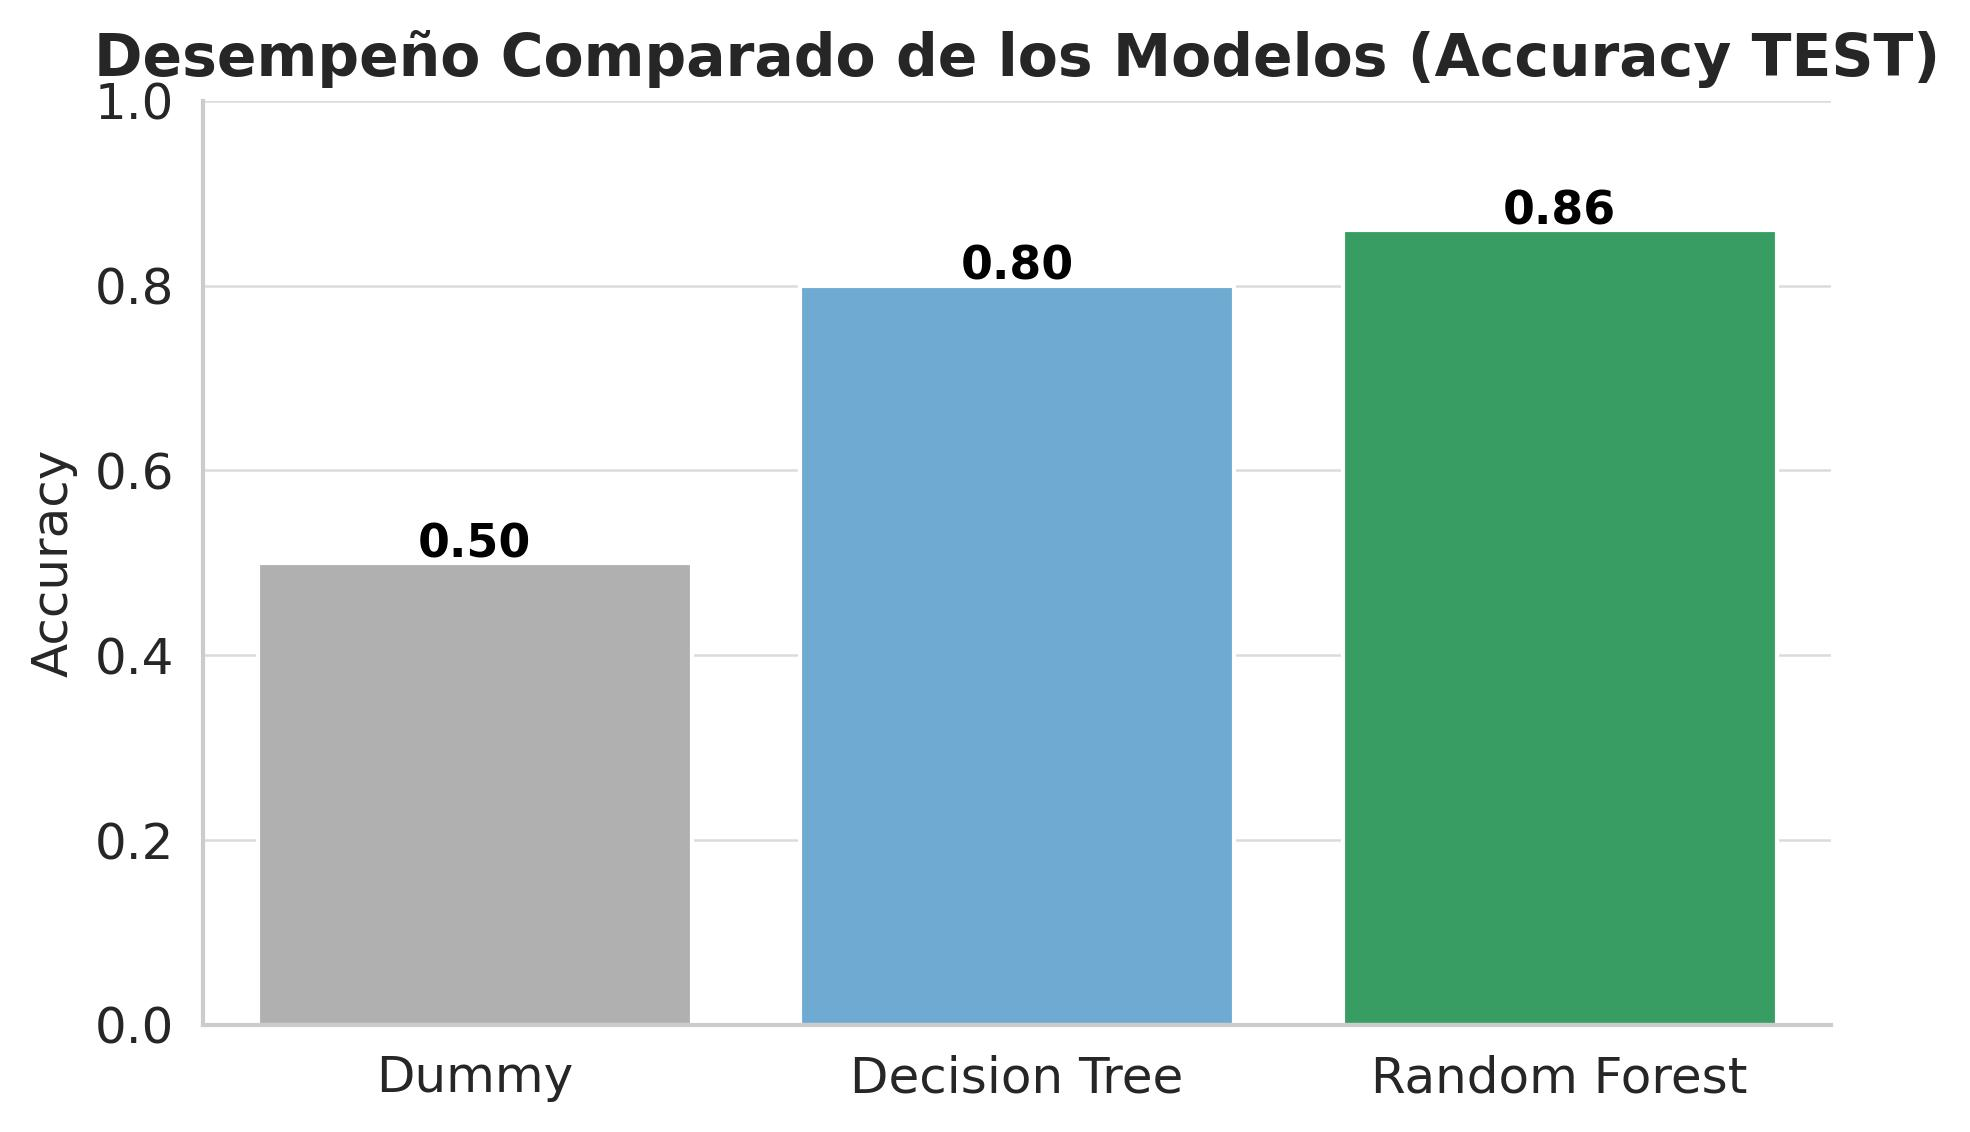

In [54]:
from IPython.display import Image, display
display(Image("/content/desempeno_modelos_barras_v3.jpg", width=600, height=300))

Resumen:
El modelo Random Forest fue el más efectivo para predecir el churn, con una precisión del 86.11% en el conjunto de prueba, mostrando buen equilibrio entre aprendizaje y generalización. Las variables más relevantes fueron:

**tenure**: Clientes con menor antigüedad tienen más probabilidad de cancelar.

**Contract_Month-to-month**: Contratos mensuales aumentan el churn.

**Contract_Two year**: Contratos a largo plazo favorecen la retención.

**InternetService_Fiber optic**: Asociado a mayor cancelación, posiblemente por problemas o costo.

**PaymentMethod_Electronic check**: Indica mayor riesgo de churn.

**OnlineSecurity, TechSupport, Dependents, Partner**: Asociadas a menor riesgo y mayor estabilidad del cliente.

##**Factores Principales que Influyen en la Cancelación**

Los principales factores que impulsan el churn son:



*   **Baja antigüedad (tenure)**: Clientes nuevos cancelan con mayor frecuencia.
*   **Tipo de contrato**: Los contratos mensuales favorecen el churn, mientras que los de dos años retienen.
*   **Método de pago**: El cheque electrónico se asocia a mayor abandono.
*   **Internet de fibra óptica**: Presenta una mayor tasa de churn, posiblemente por expectativas insatisfechas.
*   **Bajo gasto acumulado**: Clientes con menor inversión tienden a irse.
*   **Falta de servicios complementarios**: La ausencia de seguridad online o soporte técnico incrementa el riesgo de cancelación.


##**Estrategias de Retención Propuestas (Reforzadas por Modelos Predictivos)**

####**Resumen de Recomendaciones:**



*   **Atención temprana**: Monitorear y ofrecer beneficios especiales a clientes con menos de 6 meses para mejorar su experiencia inicial.

*   **Contratos largos**: Incentivar la migración de contratos mensuales a planes anuales/bianuales con descuentos y beneficios.
*   **Fibra óptica**: Mejorar la experiencia con encuestas, soporte premium y acciones correctivas rápidas.
*   **Método de pago**: Promover pagos automáticos (tarjeta/débito) y optimizar el proceso del cheque electrónico.
*   **Servicios complementarios**: Ofrecer promociones y educar sobre el valor de seguridad online y soporte técnico.




Se recomienda a Telecom X enfocar esfuerzos en clientes con menos de 6 meses mediante atención personalizada y beneficios iniciales, así como promover contratos de mayor duración con incentivos atractivos. Es clave optimizar la experiencia de los usuarios de fibra óptica y migrar a métodos de pago más estables, reduciendo el churn asociado al cheque electrónico. Finalmente, se sugiere fomentar servicios complementarios (seguridad online y soporte técnico) para aumentar la percepción de valor y fidelización.